### Implements least squares regression with radial basis functions into python from scratch


In [1]:
import data_gen
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_samples = 100
sigma = 0.2

X_data = np.random.uniform(-1, 1, size=N_samples)[:, None]
y_data = data_gen.data(X_data, noise_variance=sigma**2)

Text(0.5, 1.0, 'Data function with noise 0.2')

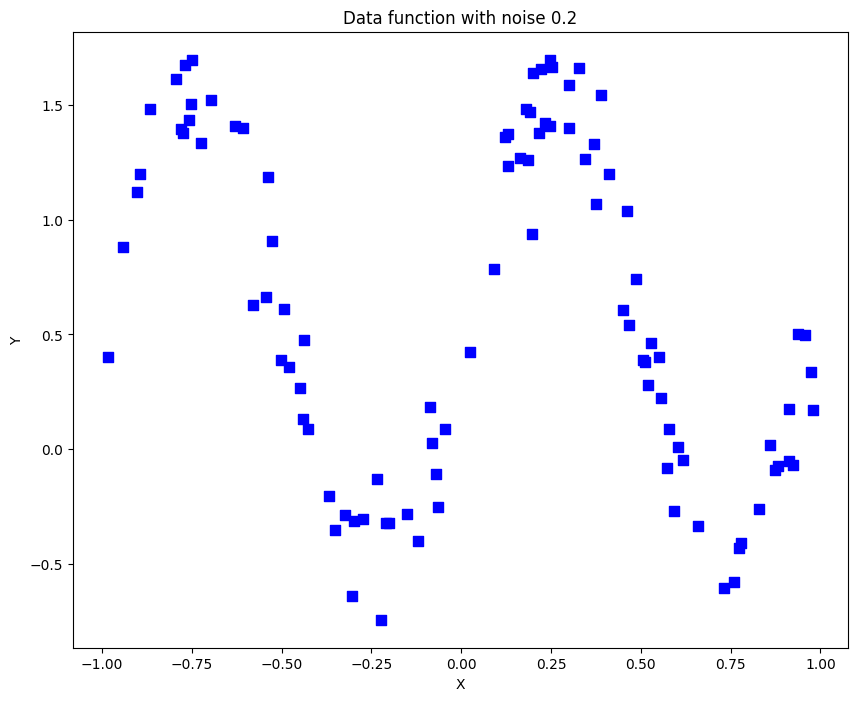

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_data, y_data, marker='s', s=60, color='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f"Data function with noise {sigma}")

### Define a radial basis function

These are Gaussians with specified centers and widths:
$$
\phi_j(x) = \text{exp} \left[\frac{(x-x^c_j)^2}{2\ell^2}\right],
$$
Where $x^c_j$ are the points where a basis function is centered and $\ell$ is a length scale parameter.

In [14]:
class RBF:
    """
    Radial Basis Function
    """
    def __init__(self, X, ell):
        self.X = X
        self.ell = ell
        self.num_basis = X.shape[0]
        
    def __call__(self, x):
        return np.exp(-0.5 * (x-self.X)**2 / self.ell**2).flatten()

In [15]:
def matrixIJ(X, phi):
    """
    Creates a matrix composed of the number of observations I and the number of basis functions J. 
    """
    num_observations = X.shape[0]
    num_basis = phi.num_basis
    Phi = np.zeros((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = phi(X[i, :])
    return Phi

<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
C:\Users\jackt\AppData\Local\Temp\ipykernel_17336\189930323.py:22: SyntaxWarning: invalid escape sequence '\p'
  ax[1].legend([f"$w_{j} \phi_{j}(x)$" for j in range(num_terms)], loc='best');


Text(0.5, 1.0, 'Impact of each RBF')

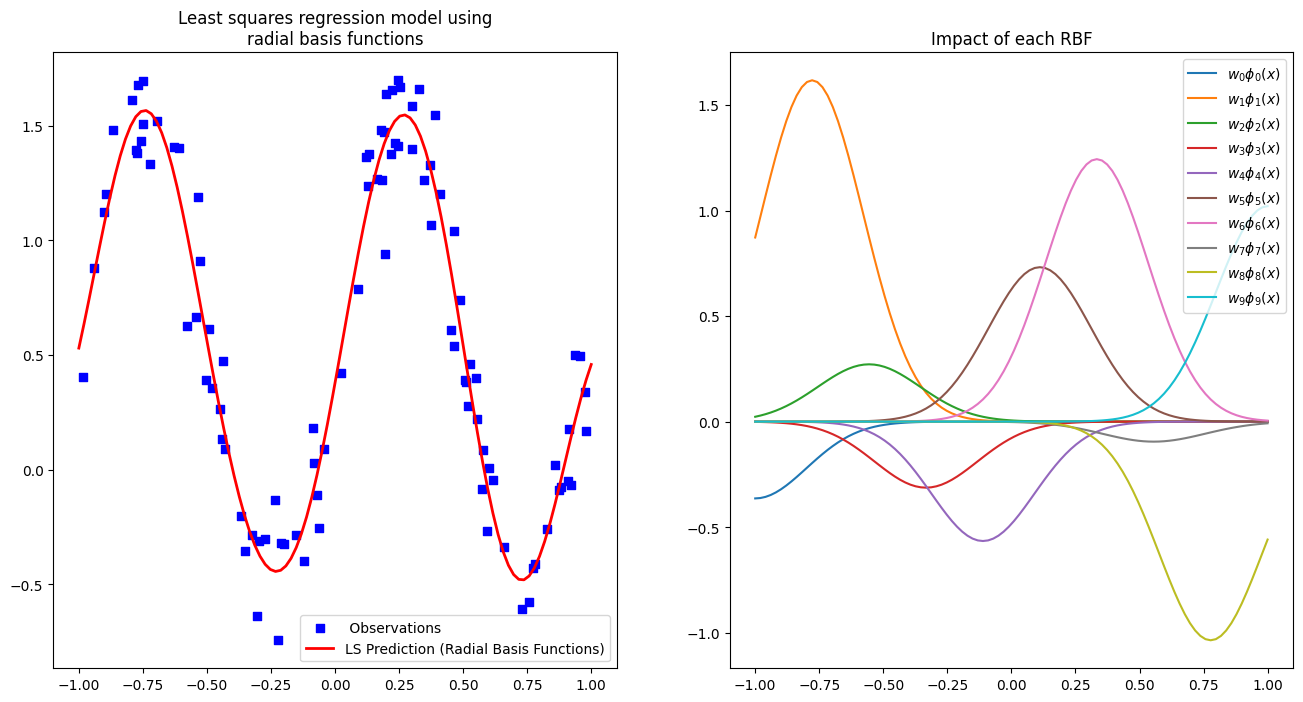

In [31]:
ell = 0.2
num_terms = 10
Xc = np.linspace(-1, 1, num_terms)[:, None]
phi = RBF(Xc, ell)

# Evaluate phi and 100 points
X_p = np.linspace(-1, 1, 100)[:, None]
Phi_p = matrixIJ(X_p, phi)

Phi = matrixIJ(X_data, phi)
w_LS = np.linalg.lstsq(Phi, y_data, rcond=None)[0]
Y_p = Phi_p @ w_LS

fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
ax[0].scatter(X_data, y_data, marker='s', label=' Observations', color='b')
ax[0].plot(X_p, Y_p, lw=2, label='LS Prediction (Radial Basis Functions)', color='r')
ax[0].legend(loc='best')
ax[0].set_title("Least squares regression model using\nradial basis functions")

for i in range(phi.num_basis):
    ax[1].plot(X_p, Phi_p[:, i] * w_LS[ i] ,'-')
ax[1].legend([f"$w_{j} \phi_{j}(x)$" for j in range(num_terms)], loc='best');
ax[1].set_title("Impact of each RBF")